# PRCP-1005-Forest Cover Prediction

# PROJECT TEAM ID: PTID-CDS-MAY-23-1518

### Problem Statement
Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which helps  to predict seven different cover types in four different wilderness areas of the Forest with the best accuracy..


### Dataset Information:
The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.
This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.
The goal of the Project is to predict seven different cover types in four different wilderness areas of the Roosevelt National Forest of Northern Colorado with the best accuracy.


#### Buisness case: To predict seven different cover types in four different wilderness areas of the Forest with the best accuracy..

##### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

##### Loading  the data

In [3]:
data=pd.read_csv('train2.csv')

#### Basic Check

In [4]:
data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [5]:
data.tail()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3
15119,15120,2475,197,34,319,78,270,189,244,164,...,0,0,0,0,0,0,0,0,0,3


## Domain Analysis
***Understanding forest composition is a valuable aspect of managing the health and vitality of our wilderness areas. Classifying cover type can help further research regarding forest fire susceptibility and de/re-forestation concerns.***
###### Feature Information:
***1)Elevation - Height above a given level, especially sea level:
"the area has a topography that ranges from 1,500 to 3,000 metres in elevation(Elevation in meters)***

***2)Aspect - Aspect in degrees azimuth. An azimuth is a direction measured in degrees clockwise from north on a circle.It ranges from 0-360 degree with north being 0° and 360°, east has azimuth 90°, south 180°, and west 270°***

***3)Slope - Slope in degrees***

***4)Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features***

***5)Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features***

***6)Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway***

***7)Hillshade columns are the RGB color representation of the shadow at a particular time so the range is already fixed between 0 and 255.***

***8)Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice***

**9)*Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice***

***10)Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice***

***11)Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points***

***12)Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation***

***13)Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation***

***14)Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation***


***The wilderness areas are:
1 - Rawah Wilderness Area
2 - Neota Wilderness Area
3 - Comanche Peak Wilderness Area
4 - Cache la Poudre Wilderness Area***


***The soil types are:
1 Cathedral family - Rock outcrop complex, extremely stony.
2 Vanet - Ratake families complex, very stony.
3 Haploborolis - Rock outcrop complex, rubbly.
4 Ratake family - Rock outcrop complex, rubbly.
5 Vanet family - Rock outcrop complex complex, rubbly.
6 Vanet - Wetmore families - Rock outcrop complex, stony.
7 Gothic family.
8 Supervisor - Limber families complex.
9 Troutville family, very stony.
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
11 Bullwark - Catamount families - Rock land complex, rubbly.
12 Legault family - Rock land complex, stony.
13 Catamount family - Rock land - Bullwark family complex, rubbly.
14 Pachic Argiborolis - Aquolis complex.
15 unspecified in the USFS Soil and ELU Survey.
16 Cryaquolis - Cryoborolis complex.
17 Gateview family - Cryaquolis complex.
18 Rogert family, very stony.
19 Typic Cryaquolis - Borohemists complex.
20 Typic Cryaquepts - Typic Cryaquolls complex.
21 Typic Cryaquolls - Leighcan family, till substratum complex.
22 Leighcan family, till substratum, extremely bouldery.
23 Leighcan family, till substratum - Typic Cryaquolls complex.
24 Leighcan family, extremely stony.
25 Leighcan family, warm, extremely stony.
26 Granile - Catamount families complex, very stony.
27 Leighcan family, warm - Rock outcrop complex, extremely stony.
28 Leighcan family - Rock outcrop complex, extremely stony.
29 Como - Legault families complex, extremely stony.
30 Como family - Rock land - Legault family complex, extremely stony.
31 Leighcan - Catamount families complex, extremely stony.
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34 Cryorthents - Rock land complex, extremely stony.
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
40 Moran family - Cryorthents - Rock land complex, extremely stony.***


    
  ***Seven categories numbered from 1 to 7 in the Cover_Type column, to be classified:***

***1: Spruce/Fir
2: Lodgepole Pine
3: Ponderosa Pine
4: Cottonwood/Willow
5: Aspen
6: Douglas-fir
7: Krummholz***

In [6]:
data.shape

(15120, 56)

***observation:
    The dataset contains 15120 observations and 56 attributes***

In [7]:
data.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

In [8]:
data.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

***observation:There are no null values present and all features present are in numericals***

In [10]:
pd.set_option('display.max_columns', None)
data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [11]:
data.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

***observation:For columns Soil_Type7 and Soil_Type15 std devtn is zero hence we can remove these columns***

***The average elevation is 2749.32m whereas the median elevation is 2752m.***

***The median aspect is 126 degree azimuth and the median slope is 15 degrees.***

***The average horizontal distance to hydrology is 227.195 m and average vertical distance to hydrology is 51.076 m***

***The maximum elevation is 3849 m.***

***The minimum distance to roadways is 0 m and maximum distance is 6890 m.***

***All Wilderness_Area and Soil_Type columns have values in the range of 0 and 1. Quiet likely these columns were categorical and was then transformed to numericals. To validate this i'm checking distinct values of following columns:***

In [12]:
data=data.drop(['Soil_Type7','Soil_Type15','Id'],axis=1)

In [13]:
data.shape

(15120, 53)

In [14]:
pd.unique(data.iloc[:,11:-1].values.ravel())

array([0, 1], dtype=int64)

***Observation:Yes all wilderness area and soil type columns consist of 0 and 1.***

In [15]:
data['Cover_Type'].value_counts()

5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: Cover_Type, dtype: int64

In [16]:
data["Cover_Type"].unique()

array([5, 2, 1, 7, 3, 6, 4], dtype=int64)

## Exploratory Data Analysis(EDA)

<AxesSubplot:xlabel='Cover_Type', ylabel='count'>

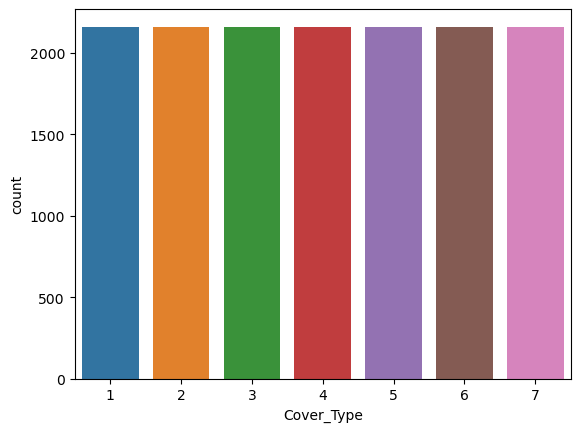

In [17]:
sns.countplot(x="Cover_Type",data=data)

***Observation:There are total 7 unique features in the target variable and the data is equally distributed among the 7 classes***

### Univariate Analysis

In [18]:
#Automated library for visualization

!pip install sweetviz     

Defaulting to user installation because normal site-packages is not writeable


In [19]:
import sweetviz as sv            # library for univariant analysis
my_report = sv.analyze(data)     # pass the original dataframe
my_report.show_html() 

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


***Observation:***

***Mostly the count of elevation is the highest when the topography ranges from 2300-2450 and from 2700-2900 and is the lowest when it exceeds 3000 and goes below 2000***

***The count of aspect is more between 80-100 degree,that is east aspect is more***

***Slope is more from 10-15 degree***

***Highest horizontal distance to hydrology ranges from 0-150 and it accordingly decreases from 200***

***Highest vertical distance to hydrology also ranges from 0-150 and it decreases above 150 and below 0***

***Highest Horizontal distance to roadways is at 1.0k***

***Hillshade index at 9am is at the peak when it is in the range of 210-250, and that at noon is from 222-230,and that at 3pm is from 140-160***

***Highest horizontal distance to nearest wildfire ignition point ranges from 0-1.50k and it accordingly decreases from 200***

***All most all wilderness area and soiltypes 0(absence) is more than 1(presence)***

## Bivariate Analysis

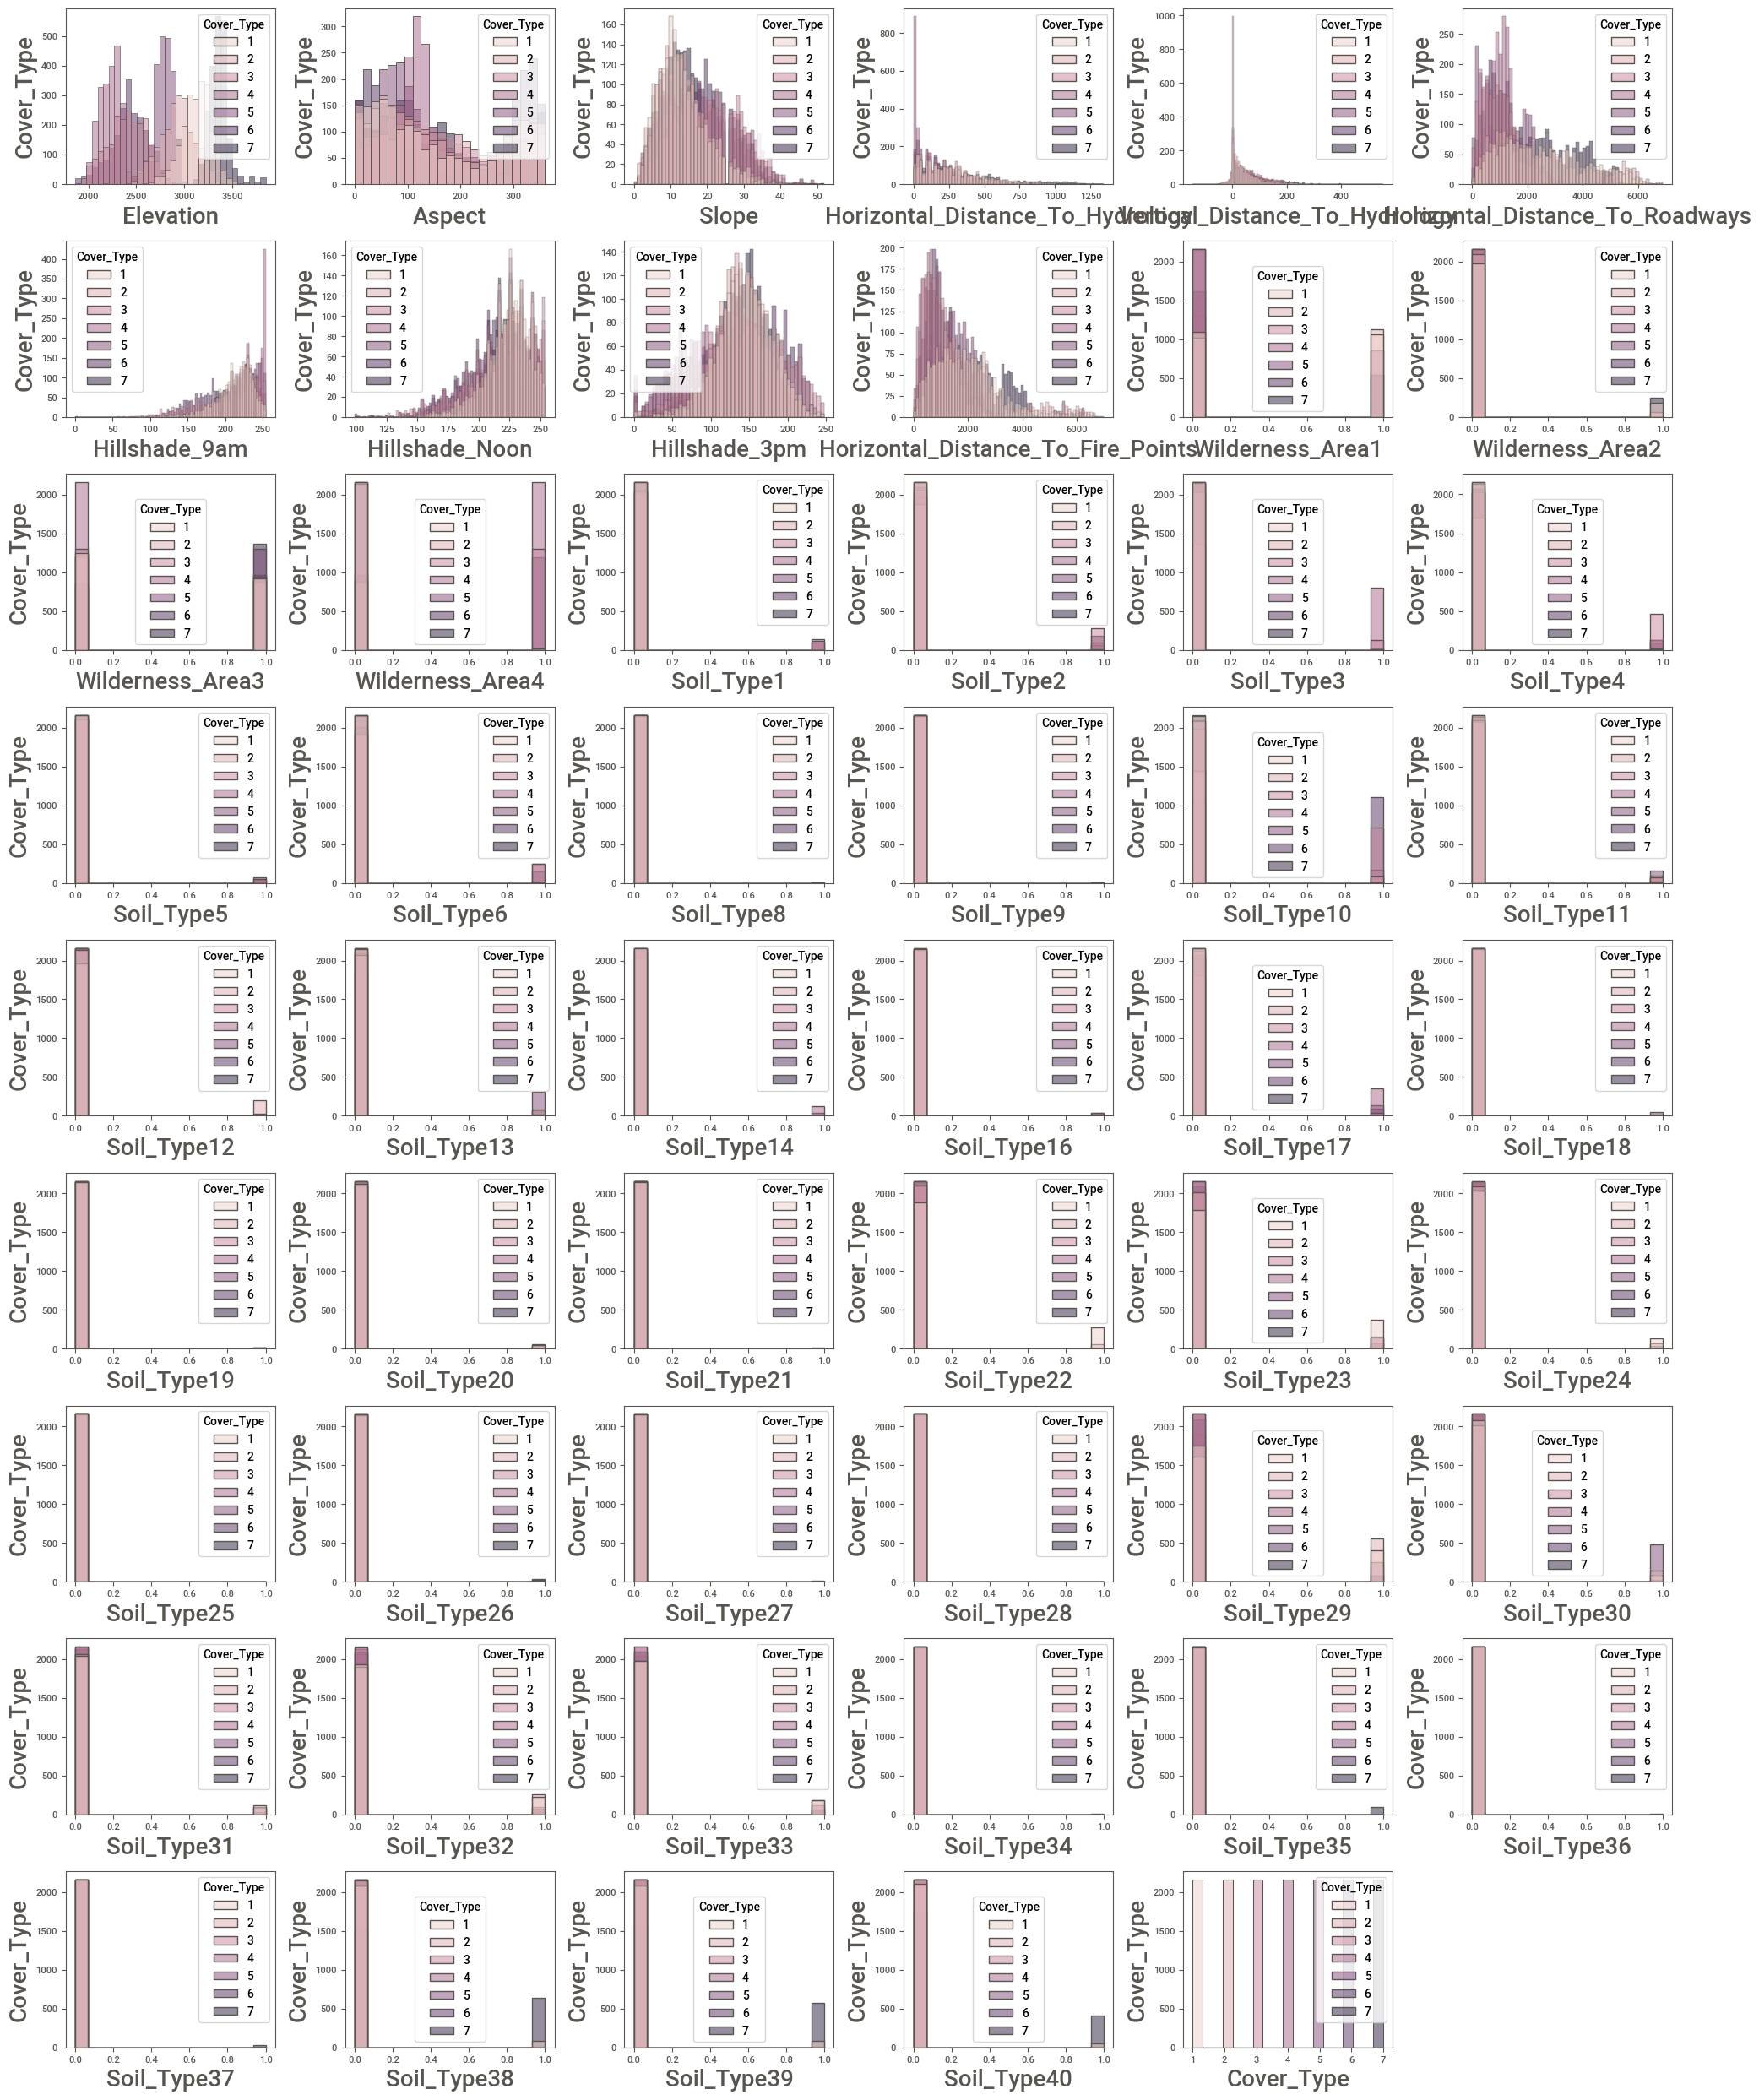

In [20]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in data:#accessing the columns 
    if plotnumber<=54:
        ax = plt.subplot(9,6,plotnumber)
        sns.histplot(x=data[column]
                        ,hue=data.Cover_Type)
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Cover_Type',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

***Observation:***

***Here 1,2,5 and 7 cover types have the highest horizontal distance to hydrology and only at the range of 0-150***

***Here the highest vertical distance to hydrology and only at the range of 0-150***


***Here 1,2,3,and 6 over types have the highest horizontal distance to roadways at the 1k***

***Here 1,2,5,and 7 cover types have the highest horizontal distance to fire pointst the range of 0-1.50k***

***Wilderness area is a distinctive feature for determining the Cover_Type and for all most all wilderness area and soiltypes 0(absence) is more than 1(presence)***

## Data Preprocessing and Feature engineering

***Ignore Wilderness_Area and Soil_Type as they are binary.***  

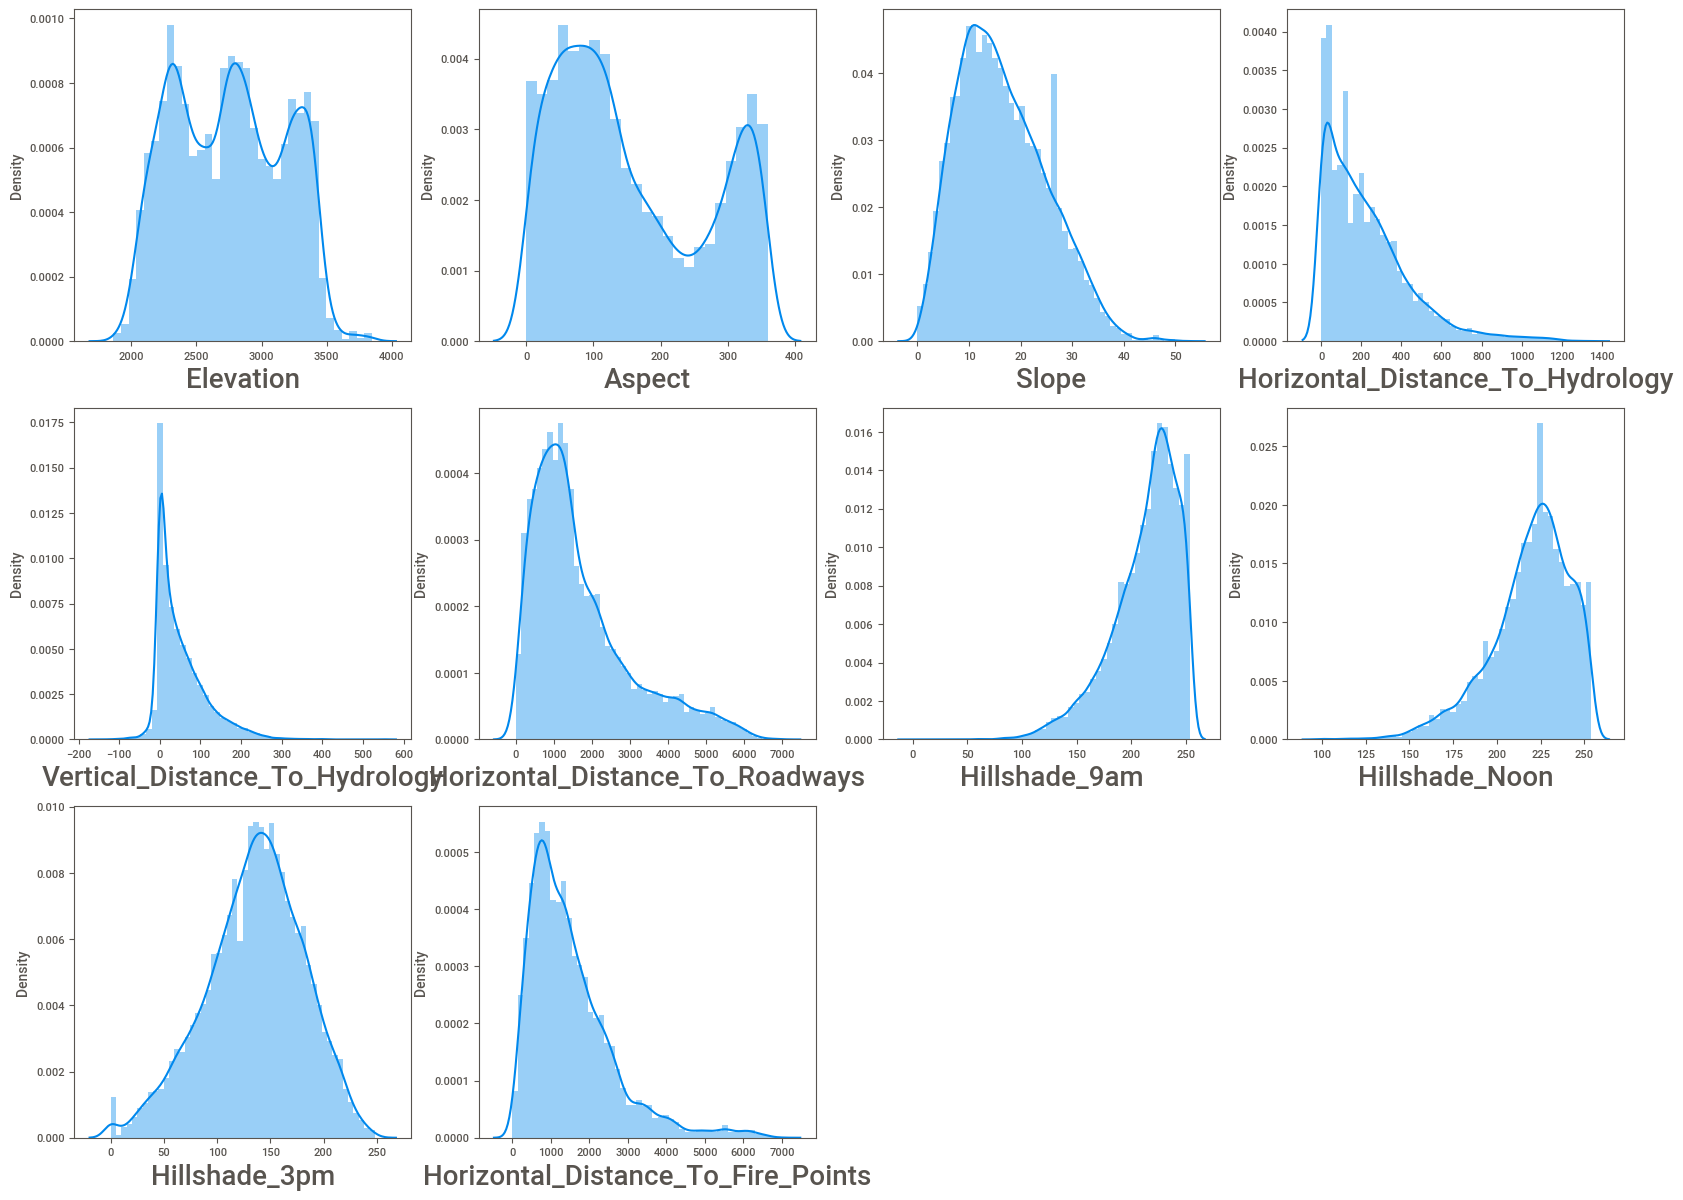

In [21]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1 #maintian count for graph

for column in data.iloc[:,0:10]:
    if plotnumber<=20 :# as there are 20 columns in the data
        ax = plt.subplot(5,4,plotnumber)# plotting 20 graphs (5-rows,4-columns) ,plotnumber is for count 
        sns.distplot(data[column])#plotting dist plot to know distribution
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

***Observation:Since not all features are having a normal distribution we will use IQR to find the outliers***

###### Outlier Analysis

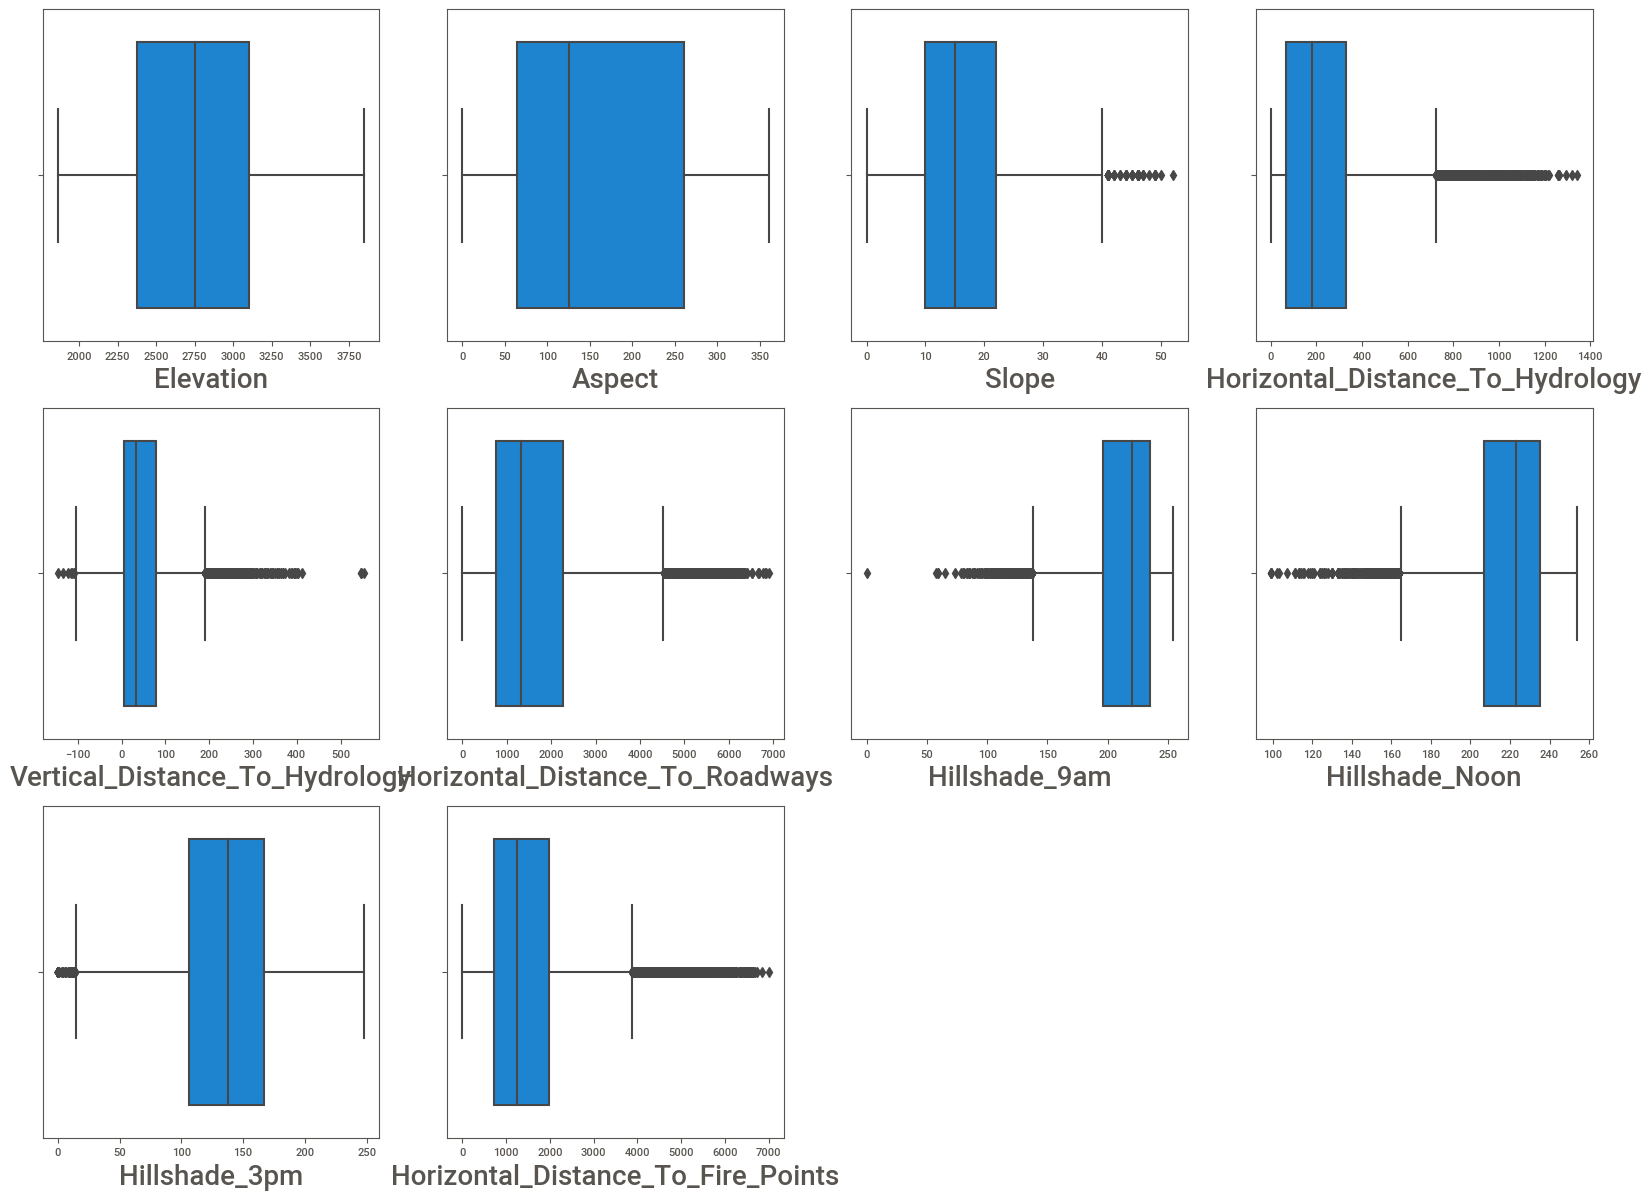

In [22]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data.iloc[:,0:10]:
    if plotnumber<=20:
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(data[column]) 
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

***Observation:***
***Slope is taking on least range compared to all features. Having little range means mean and median will be quite close. It does have a few outliers though but not more than 5% so we are not removing it.***

***Aspect and Elevation feature is the only one which do not have any outliers having a range of 360 for aspect. Since both Aspect and Slope are measured in degrees, Aspect takes on much bigger range than Slope because it has lowest max score.***

***Hillshades feature also having similar plot like Slope including many outliers and taking on smaller range. Similiar plot is for Vertical_Distance_To_Hydrology except here the minimum value is negative.***

***Elevation and Hillshade_Noon are the only features that doesn't have minimum value of 0.***

***Horizontal_Distance_To_Roadways is the most spread data of all features because it has the highest standard deviation score followed by Horizontal_Distance_To_Fire_Points though this feature has the maximum value. We can see visually only how spread these are and which one is most.***

***The features Vertical_Distance_To_Hydrology and Hillshade_9am have outliers that are more than 5%,hence we will remove these outliers***

In [23]:
data.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'Cover_Type'],
      dtype

In [24]:
from scipy import stats

In [25]:
IQR=stats.iqr(data.Vertical_Distance_To_Hydrology,interpolation='midpoint')
IQR

74.0

In [26]:
Q1=data.Vertical_Distance_To_Hydrology.quantile(0.25)
Q3=data.Vertical_Distance_To_Hydrology.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
max_limit

190.0

In [27]:
data.loc[data['Vertical_Distance_To_Hydrology'] > max_limit,'Vertical_Distance_To_Hydrology']=data['Vertical_Distance_To_Hydrology'].median()

In [28]:
IQR=stats.iqr(data.Hillshade_9am,interpolation='midpoint')
IQR

39.0

In [29]:
Q1=data.Hillshade_9am.quantile(0.25)
Q3=data.Hillshade_9am.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit

137.5

In [30]:
data.loc[data['Hillshade_9am'] < min_limit,'Hillshade_9am']=data['Hillshade_9am'].median()

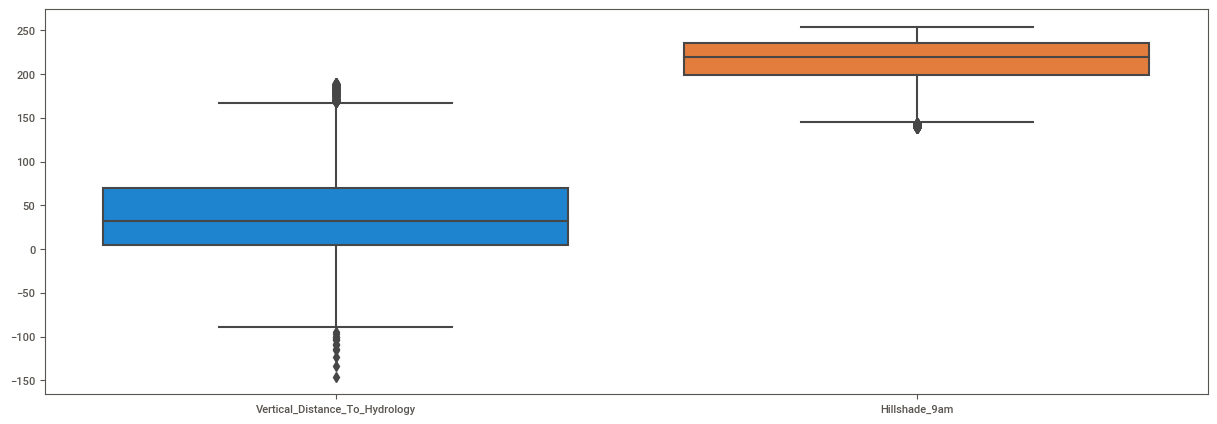

In [31]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data[['Vertical_Distance_To_Hydrology','Hillshade_9am']])
plt.show()

### Feature Selection

In [32]:
data1=data.iloc[:,:10]
data1

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596,51,3,258,0,510,221,232,148,6279
1,2590,56,2,212,-6,390,220,235,151,6225
2,2804,139,9,268,65,3180,234,238,135,6121
3,2785,155,18,242,118,3090,238,238,122,6211
4,2595,45,2,153,-1,391,220,234,150,6172
...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282
15116,2603,121,19,633,32,618,249,221,91,1325
15117,2492,134,25,365,117,335,250,220,83,1187
15118,2487,167,28,218,101,242,229,237,119,932


<AxesSubplot:>

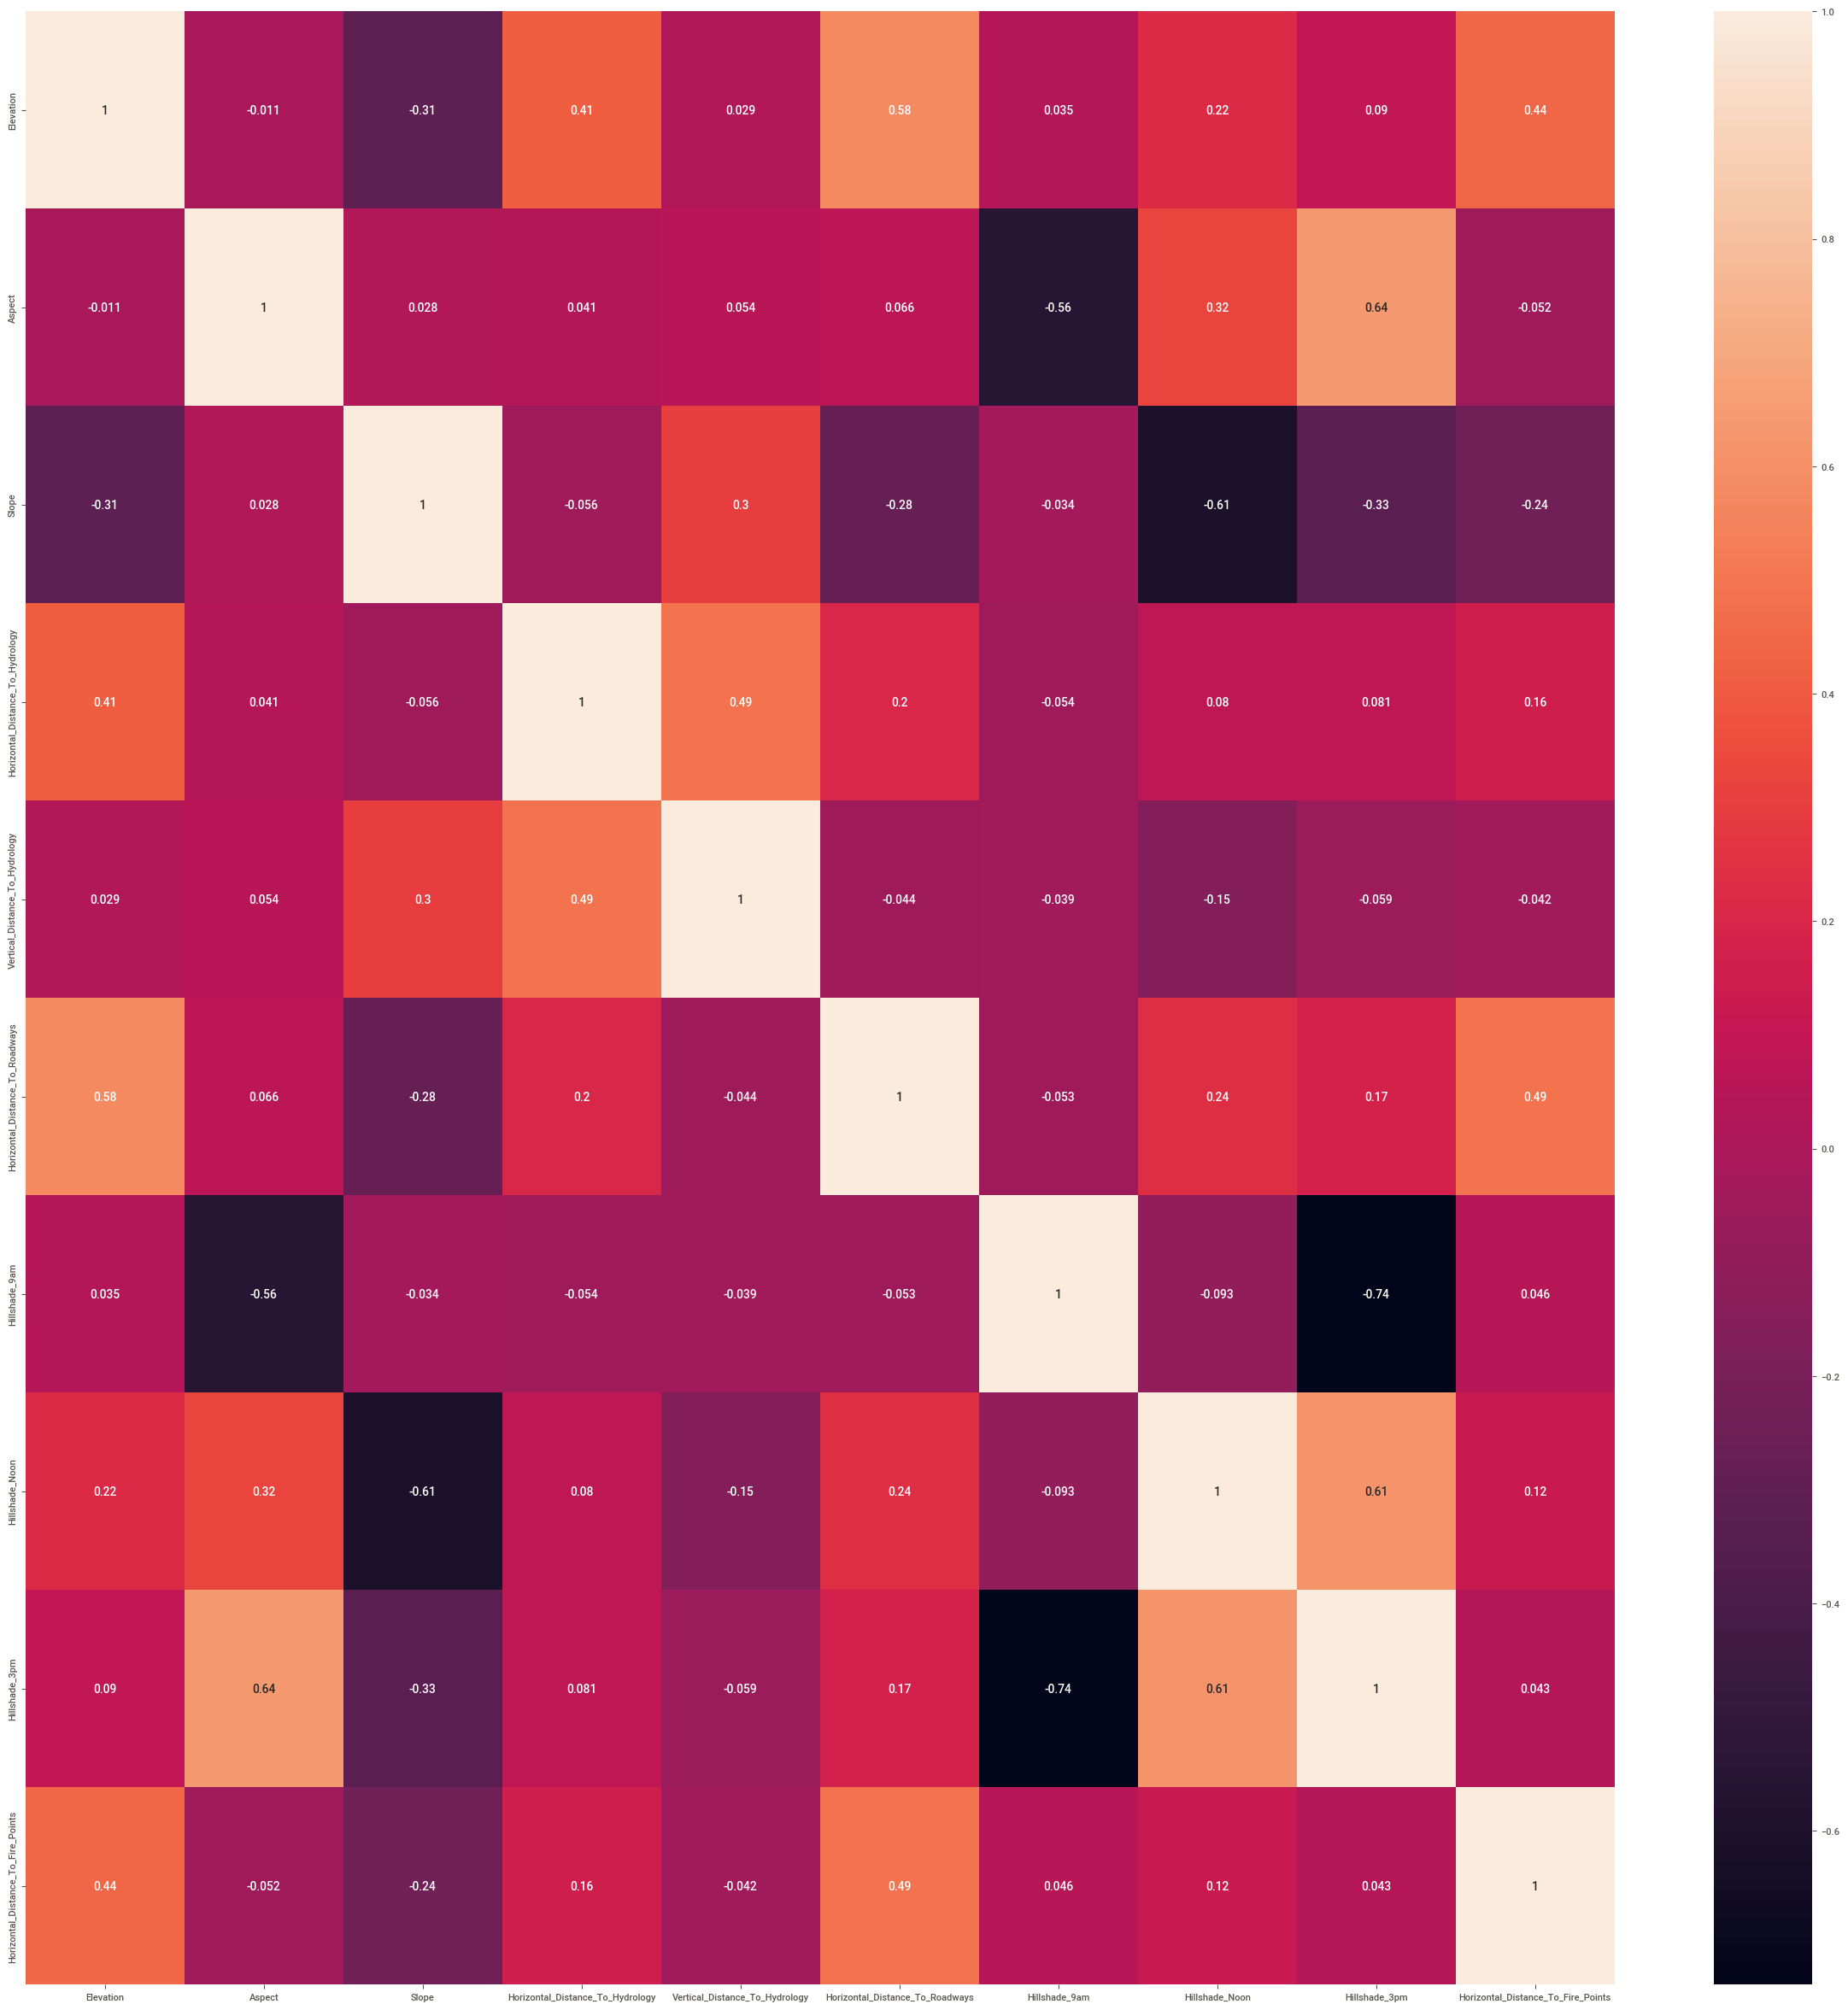

In [33]:
plt.figure(figsize=(30, 30))
sns.heatmap(data1.corr(),annot=True)

***Observation:***

***Hillshade_3pm and Hillshade_9am show highly negative correlation while hillshade_3pm and Aspect show highest positive correlation.***

***Hillshade_3pm and Aspect also had almost normal distribution compared to forest cover types classes.***

***None of the features are highly correlated(more than 0.90) thus we are good to go***

## Model Creation

In [34]:
x = data.drop([ "Cover_Type"], axis=1).reset_index(drop=True) # dropped id and target collumn

In [35]:
y=data["Cover_Type"]   #droped the target

In [36]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x, y,random_state=3)

In [37]:
# Checking the dimension of our train and test splits
print('Shape of x_train: ',X_train.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of x_test: ',X_test.shape)
print('Shape of y_test: ',y_test.shape)

Shape of x_train:  (11340, 52)
Shape of y_train:  (11340,)
Shape of x_test:  (3780, 52)
Shape of y_test:  (3780,)


## Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier #importing decision tree from sklearn.tree
dt=DecisionTreeClassifier() #object creation for decision tree  
dt.fit(X_train, y_train) #training the model

DecisionTreeClassifier()

In [41]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,recall_score,precision_score


In [39]:
y_hat=dt.predict(X_train)#prediction
y_hat#predicted values 

array([4, 6, 6, ..., 2, 1, 6], dtype=int64)

In [42]:
print(classification_report(y_train,y_hat)) # train data

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1629
           2       1.00      1.00      1.00      1604
           3       1.00      1.00      1.00      1602
           4       1.00      1.00      1.00      1650
           5       1.00      1.00      1.00      1633
           6       1.00      1.00      1.00      1604
           7       1.00      1.00      1.00      1618

    accuracy                           1.00     11340
   macro avg       1.00      1.00      1.00     11340
weighted avg       1.00      1.00      1.00     11340



In [43]:
y_hat1=dt.predict(X_test)#prediction
y_hat1

array([7, 2, 1, ..., 1, 6, 2], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,recall_score,precision_score
print(classification_report(y_test,y_hat1)) # test data

              precision    recall  f1-score   support

           1       0.66      0.65      0.65       531
           2       0.64      0.62      0.63       556
           3       0.73      0.74      0.73       558
           4       0.90      0.92      0.91       510
           5       0.87      0.89      0.88       527
           6       0.78      0.74      0.76       556
           7       0.90      0.92      0.91       542

    accuracy                           0.78      3780
   macro avg       0.78      0.78      0.78      3780
weighted avg       0.78      0.78      0.78      3780



***observation:accuracy score of train data is 100% and that of test data is 78% hence the model is overfitted***

## Hyperparameter tunning for decision tree

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1,20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=3, cv=3)

#passing model to gridsearchCV 

#tree_cv.fit(X_train,y_train)#training data on gridsearch cv
#best_params = tree_cv.best_params_#it will give you best parameters 
#print(f"Best paramters: {best_params})")#printing  best parameters


In [47]:
dt1 = DecisionTreeClassifier(criterion='gini',max_depth=12,min_samples_leaf= 1,min_samples_split=2,splitter='best')#passing best parameter to decision tree

In [48]:
dt1.fit(X_train, y_train)#traing model with best parameter

DecisionTreeClassifier(max_depth=12)

In [49]:
y_pred_train1  = dt1.predict(X_train)

In [50]:
print(classification_report(y_train, y_pred_train1))   #train data

              precision    recall  f1-score   support

           1       0.84      0.86      0.85      1629
           2       0.86      0.74      0.80      1604
           3       0.87      0.89      0.88      1602
           4       0.97      0.97      0.97      1650
           5       0.88      0.96      0.92      1633
           6       0.88      0.88      0.88      1604
           7       0.96      0.97      0.96      1618

    accuracy                           0.89     11340
   macro avg       0.89      0.89      0.89     11340
weighted avg       0.89      0.89      0.89     11340



In [51]:
y_hat1 = dt1.predict(X_test)#predicting
y_hat1

array([7, 2, 1, ..., 2, 6, 2], dtype=int64)

In [52]:
print(classification_report(y_test,y_hat1))#it will give precision,recall,f1 scores and accuracy #test data

              precision    recall  f1-score   support

           1       0.69      0.69      0.69       531
           2       0.69      0.58      0.63       556
           3       0.70      0.75      0.73       558
           4       0.90      0.94      0.92       510
           5       0.80      0.91      0.85       527
           6       0.78      0.70      0.74       556
           7       0.90      0.93      0.91       542

    accuracy                           0.78      3780
   macro avg       0.78      0.78      0.78      3780
weighted avg       0.78      0.78      0.78      3780



***Observation:The accuracy of trained data after using hyperparameter tuning is 89% and that of test data is 78%***

## RandomForest Regression

In [53]:
from sklearn.ensemble import RandomForestClassifier
MR=RandomForestClassifier(n_estimators=100)
MR.fit(X_train,y_train)

RandomForestClassifier()

In [54]:
rf_hat=MR.predict(X_train)#prediction
rf_hat#predicted values 

array([4, 6, 6, ..., 2, 1, 6], dtype=int64)

In [55]:
print(classification_report(y_train,rf_hat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1629
           2       1.00      1.00      1.00      1604
           3       1.00      1.00      1.00      1602
           4       1.00      1.00      1.00      1650
           5       1.00      1.00      1.00      1633
           6       1.00      1.00      1.00      1604
           7       1.00      1.00      1.00      1618

    accuracy                           1.00     11340
   macro avg       1.00      1.00      1.00     11340
weighted avg       1.00      1.00      1.00     11340



In [56]:
rf_pred=MR.predict(X_test)

In [57]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           1       0.76      0.74      0.75       531
           2       0.80      0.69      0.74       556
           3       0.84      0.80      0.82       558
           4       0.92      0.99      0.96       510
           5       0.91      0.97      0.93       527
           6       0.85      0.85      0.85       556
           7       0.92      0.97      0.94       542

    accuracy                           0.86      3780
   macro avg       0.85      0.86      0.86      3780
weighted avg       0.85      0.86      0.85      3780



***observation:accuracy score of train data is 100% and that of test data is 86% hence the model is overfitted***

## Hyperparameter tunning for RandomForest

In [58]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 100, num=10)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1,param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

#rf_cv.fit(X_train, y_train)##training data on randomsearch cv
#rf_best_params = rf_cv.best_params_##it will give you best parameters 
#print(f"Best paramters: {rf_best_params})")##printing  best parameters
 


In [59]:
rf_clf2 = RandomForestClassifier(n_estimators=400,min_samples_split=10,min_samples_leaf=1,max_features='sqrt',max_depth=30,bootstrap=True)#passing best parameter to randomforest
rf_clf2.fit(X_train, y_train)#training 
y_predict=rf_clf2.predict(X_test)#testing


In [60]:
y_pred_train  = rf_clf2.predict(X_train)

In [61]:
print(classification_report(y_train, y_pred_train))   #train data

              precision    recall  f1-score   support

           1       0.97      0.95      0.96      1629
           2       0.97      0.92      0.94      1604
           3       0.97      0.96      0.96      1602
           4       0.97      1.00      0.98      1650
           5       0.97      0.99      0.98      1633
           6       0.95      0.97      0.96      1604
           7       0.98      0.99      0.99      1618

    accuracy                           0.97     11340
   macro avg       0.97      0.97      0.97     11340
weighted avg       0.97      0.97      0.97     11340



In [62]:
print(classification_report(y_test, y_predict))   #train data

              precision    recall  f1-score   support

           1       0.75      0.74      0.74       531
           2       0.79      0.68      0.73       556
           3       0.82      0.79      0.80       558
           4       0.91      0.99      0.95       510
           5       0.90      0.96      0.93       527
           6       0.83      0.82      0.83       556
           7       0.92      0.96      0.94       542

    accuracy                           0.85      3780
   macro avg       0.84      0.85      0.84      3780
weighted avg       0.84      0.85      0.84      3780



***Observation:The accuracy of trained data after using hyperparameter tuning is 97% and that of test data is 85%***

In [63]:
imp=rf_clf2.feature_importances_
imp

array([2.51903611e-01, 4.18653973e-02, 2.96240903e-02, 5.91492564e-02,
       4.36360753e-02, 9.00391426e-02, 4.12571897e-02, 3.76077959e-02,
       3.83186302e-02, 6.52173954e-02, 2.24508183e-02, 4.13217923e-03,
       2.00704181e-02, 5.14386017e-02, 1.51076711e-03, 7.08851214e-03,
       2.10253128e-02, 1.43161173e-02, 1.40038107e-03, 2.88248921e-03,
       1.92337751e-06, 7.83225704e-05, 2.71253700e-02, 3.38865904e-03,
       5.34282003e-03, 7.22605243e-03, 8.14739452e-04, 1.09129487e-03,
       7.07766796e-03, 7.84370148e-04, 3.52689766e-04, 1.61475379e-03,
       2.75870685e-04, 6.00978736e-03, 5.69534645e-03, 2.75581984e-03,
       0.00000000e+00, 5.21811801e-04, 2.11526186e-04, 1.55480328e-04,
       5.38632187e-03, 9.18001711e-03, 2.17547141e-03, 5.14583929e-03,
       3.84963057e-03, 2.75063105e-04, 2.47693713e-03, 1.01457246e-04,
       5.92184959e-04, 2.28376743e-02, 2.19669838e-02, 1.05539321e-02])

<AxesSubplot:>

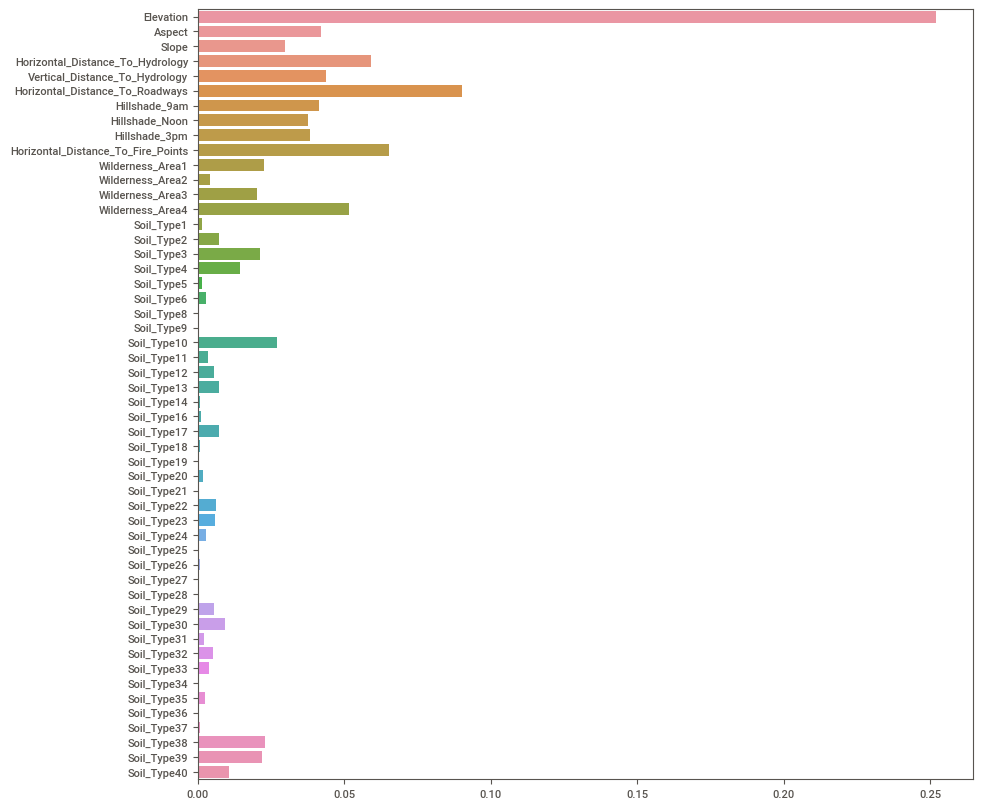

In [64]:
plt.figure(figsize=(10, 10))
sns.barplot(y=data.columns[:52],x=imp)

***Observation:The feature 'Elevation' has more importance in determining the forest cover type than any other features under random forest regresion model using hyperparameter tuning***

## KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier#USING KNN
KNN1=KNeighborsClassifier(n_neighbors=5) ## model object creation
KNN1.fit(X_train,y_train)  ## fitting the model
y_hat_knn=KNN1.predict(X_test) ## getting the predict from created model

In [66]:
knn_tr=KNN1.predict(X_train)

In [67]:
print(classification_report(y_train,knn_tr))

              precision    recall  f1-score   support

           1       0.84      0.77      0.80      1629
           2       0.84      0.68      0.75      1604
           3       0.89      0.83      0.86      1602
           4       0.90      0.98      0.94      1650
           5       0.85      0.98      0.91      1633
           6       0.87      0.89      0.88      1604
           7       0.91      0.98      0.94      1618

    accuracy                           0.87     11340
   macro avg       0.87      0.87      0.87     11340
weighted avg       0.87      0.87      0.87     11340



In [68]:
print(classification_report(y_test,y_hat_knn))

              precision    recall  f1-score   support

           1       0.69      0.65      0.67       531
           2       0.73      0.52      0.61       556
           3       0.78      0.73      0.75       558
           4       0.85      0.97      0.91       510
           5       0.83      0.97      0.89       527
           6       0.79      0.80      0.79       556
           7       0.87      0.96      0.91       542

    accuracy                           0.80      3780
   macro avg       0.79      0.80      0.79      3780
weighted avg       0.79      0.80      0.79      3780



***Observation:The accuracy of trained data is 87% and that of test data is 80%***

## Gradient Boosting

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
dt=GradientBoostingClassifier()
dt.fit(X_train, y_train)

GradientBoostingClassifier()

In [70]:
y_pred2=dt.predict(X_train)
y_pred2

array([4, 3, 6, ..., 1, 1, 6], dtype=int64)

In [71]:
y_pred3=dt.predict(X_test)
y_pred3

array([7, 2, 1, ..., 2, 6, 2], dtype=int64)

In [72]:
print(classification_report(y_train,y_pred2))   #train data

              precision    recall  f1-score   support

           1       0.79      0.78      0.78      1629
           2       0.80      0.64      0.71      1604
           3       0.81      0.77      0.79      1602
           4       0.93      0.97      0.95      1650
           5       0.83      0.94      0.88      1633
           6       0.79      0.83      0.81      1604
           7       0.93      0.96      0.95      1618

    accuracy                           0.84     11340
   macro avg       0.84      0.84      0.84     11340
weighted avg       0.84      0.84      0.84     11340



In [73]:
print(classification_report(y_test, y_pred3)) #test data

              precision    recall  f1-score   support

           1       0.69      0.67      0.68       531
           2       0.74      0.58      0.65       556
           3       0.76      0.73      0.75       558
           4       0.91      0.98      0.94       510
           5       0.79      0.92      0.85       527
           6       0.77      0.76      0.76       556
           7       0.89      0.94      0.92       542

    accuracy                           0.80      3780
   macro avg       0.79      0.80      0.79      3780
weighted avg       0.79      0.80      0.79      3780



***Observation:accuracy of train data is 84% and of test data is 80%***

## Logistic Regression

In [74]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)

In [75]:
X_train,X_test,y_train,y_test=train_test_split(scaled_data, y,random_state=3)

In [76]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [77]:
y_pred1 = LR.predict(X_train)
y_pred1

array([6, 4, 6, ..., 2, 1, 6], dtype=int64)

In [78]:
y_pred = LR.predict(X_test)
y_pred

array([1, 2, 7, ..., 2, 6, 2], dtype=int64)

In [79]:
print(classification_report(y_train, y_pred1)) #train data

              precision    recall  f1-score   support

           1       0.67      0.70      0.68      1629
           2       0.63      0.53      0.58      1604
           3       0.63      0.55      0.59      1602
           4       0.80      0.89      0.84      1650
           5       0.74      0.81      0.77      1633
           6       0.60      0.63      0.62      1604
           7       0.89      0.89      0.89      1618

    accuracy                           0.71     11340
   macro avg       0.71      0.71      0.71     11340
weighted avg       0.71      0.71      0.71     11340



In [80]:
print(classification_report(y_test, y_pred)) #test data

              precision    recall  f1-score   support

           1       0.63      0.68      0.65       531
           2       0.62      0.53      0.57       556
           3       0.64      0.58      0.61       558
           4       0.79      0.89      0.84       510
           5       0.71      0.79      0.74       527
           6       0.63      0.60      0.62       556
           7       0.88      0.87      0.87       542

    accuracy                           0.70      3780
   macro avg       0.70      0.70      0.70      3780
weighted avg       0.70      0.70      0.70      3780



***Observation:Accuracy of trained data is 71% and that of test data is 70%***

## Support Vector Machine

In [81]:
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default pbarameters
svclassifier.fit(X_train, y_train)

SVC()

In [82]:
sv_hat=svclassifier.predict(X_train)#prediction
sv_hat#predicted values 

array([6, 4, 6, ..., 2, 1, 6], dtype=int64)

In [83]:
print(classification_report(y_train,sv_hat))

              precision    recall  f1-score   support

           1       0.68      0.71      0.69      1629
           2       0.65      0.60      0.62      1604
           3       0.68      0.62      0.65      1602
           4       0.81      0.96      0.88      1650
           5       0.79      0.81      0.80      1633
           6       0.67      0.65      0.66      1604
           7       0.92      0.86      0.89      1618

    accuracy                           0.75     11340
   macro avg       0.74      0.74      0.74     11340
weighted avg       0.74      0.75      0.74     11340



In [84]:
y_hat=svclassifier.predict(X_test)

In [85]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           1       0.61      0.67      0.64       531
           2       0.64      0.58      0.61       556
           3       0.66      0.59      0.62       558
           4       0.78      0.96      0.87       510
           5       0.78      0.77      0.78       527
           6       0.66      0.62      0.64       556
           7       0.91      0.86      0.88       542

    accuracy                           0.72      3780
   macro avg       0.72      0.72      0.72      3780
weighted avg       0.72      0.72      0.72      3780



***Observation:The accuracy of trained data is 75% and that of test data is 72%***

## Bagging for SVM

In [86]:
from sklearn.ensemble import BaggingClassifier#import bagging 
model_bagg1=BaggingClassifier(base_estimator=svclassifier,n_estimators=20) ## model objet creation
#base_estimator---> algorithm which you want to pass
#n_estimotors-----> number of base learners
model_bagg1.fit(X_train,y_train) ## fitting the model
y_hat_bagg=model_bagg1.predict(X_test) ## getting the prediction

In [87]:
y_hat_bagg1=model_bagg1.predict(X_train)

In [88]:
print(classification_report(y_train,y_hat_bagg1))

              precision    recall  f1-score   support

           1       0.68      0.72      0.70      1629
           2       0.66      0.60      0.63      1604
           3       0.69      0.63      0.66      1602
           4       0.81      0.96      0.88      1650
           5       0.79      0.81      0.80      1633
           6       0.67      0.65      0.66      1604
           7       0.93      0.86      0.89      1618

    accuracy                           0.75     11340
   macro avg       0.75      0.75      0.74     11340
weighted avg       0.75      0.75      0.75     11340



In [89]:
print(classification_report(y_test,y_hat_bagg))

              precision    recall  f1-score   support

           1       0.60      0.67      0.63       531
           2       0.63      0.58      0.60       556
           3       0.66      0.60      0.63       558
           4       0.78      0.96      0.86       510
           5       0.78      0.78      0.78       527
           6       0.66      0.61      0.63       556
           7       0.91      0.86      0.88       542

    accuracy                           0.72      3780
   macro avg       0.72      0.72      0.72      3780
weighted avg       0.72      0.72      0.71      3780



***Observation:Still after using bagging for SVM the accuracy has no further changes***

## Conclusion
- Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the feature set.

- Testing multiple algorithms with fine-tuning hyperparamters gave some understanding on the model performance for various algorithms on this specific dataset.
- The hyperparameter tuning on RandomForest helps in the good performance on the current dataset.
- We used Decision Tree, Random Forest,Support Vector Machine,KNN, Logistic Regression,Gradient Boosting
- RandomForest with hyperparameter tuning is preferred among all the models as it gave the best accuracy.